# Stead analysis
This notebooke examines native stead data

In [1]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt


In [2]:
file_name = "data/STEAD/chunk2.hdf5"
csv_file = "data/STEAD/chunk2.csv"


In [3]:
# reading the csv file into a dataframe:
df = pd.read_csv(csv_file, low_memory=False)
print(f'total events in csv file: {len(df)}')
# filterering the dataframe
df = df[(df.trace_category == 'earthquake_local') & (df.source_distance_km <= 20) & (df.source_magnitude > 3)]
print(f'total events selected: {len(df)}')

# making a list of trace names for the selected data
ev_list = df['trace_name'].to_list()


total events in csv file: 200000
total events selected: 268


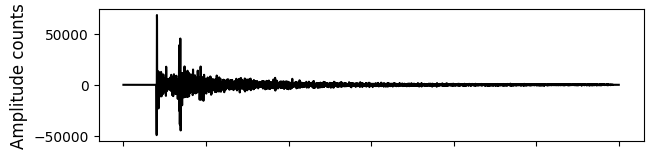

back_azimuth_deg 56.9
coda_end_sample [[1228.]]
network_code CN
p_arrival_sample 400.0
p_status manual
p_travel_sec 4.630000114440918
p_weight 0.5
receiver_code A16
receiver_elevation_m 13.0
receiver_latitude 47.468
receiver_longitude -70.0096
receiver_type HH
s_arrival_sample 686.0
s_status manual
s_weight 0.5
snr_db [72.40000153 61.70000076 62.20000076]
source_depth_km 17.42
source_depth_uncertainty_km 7.6
source_distance_deg 0.18
source_distance_km 19.21
source_error_sec 0.8797
source_gap_deg 37.699
source_horizontal_uncertainty_km 2.68655
source_id 606589340
source_latitude 47.3748
source_longitude -70.2239
source_magnitude 3.7
source_magnitude_author None
source_magnitude_type mb_lg
source_mechanism_strike_dip_rake None
source_origin_time 2015-01-21 05:31:58.92
source_origin_uncertainty_sec 0.76
trace_category earthquake_local
trace_name A16.CN_20150121053158_EV
trace_start_time 2015-01-21 05:31:59.550000


In [ ]:
with h5py.File(file_name, 'r') as dtfl:
    for c, evi in enumerate(ev_list):
        dataset = dtfl.get('data/'+str(evi))
        # waveforms, 3 channels: first row: E channel, second row: N channel, third row: Z channel
        data = np.array(dataset)

        fig = plt.figure()
        ax = fig.add_subplot(313)
        plt.plot(data[:,2], 'k')
        plt.rcParams["figure.figsize"] = (8,5)
        legend_properties = {'weight':'bold'}
        plt.tight_layout()
        plt.ylabel('Amplitude counts', fontsize=12)
        ax.set_xticklabels([])
        plt.show()

        for at in dataset.attrs:
            print(at, dataset.attrs[at])

        inp = input("Press a key to plot the next waveform!")
        if inp == "r":
            continue
